Інсталюємо необхідні бібліотеки

In [198]:
%pip install numpy pandas scikit-learn seaborn matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Імпортуємо необхідні бібліотеки

In [199]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

Завантажуємо всі три датасети. Виводимо, скільки датасет містить даних і які стовпці містить 

In [200]:
heart_disease_dataset_1 = pd.read_csv("Dataset/data_1.csv")
print(heart_disease_dataset_1)
print(heart_disease_dataset_1.columns)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  

In [201]:
heart_disease_dataset_2 = pd.read_csv("Dataset/data_2.csv")
print(heart_disease_dataset_2)
print(heart_disease_dataset_2.columns)

     age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak slope ca  \
0     28    1   2      130  132   0       2     185     0      0.0     ?  ?   
1     29    1   2      120  243   0       0     160     0      0.0     ?  ?   
2     29    1   2      140    ?   0       0     170     0      0.0     ?  ?   
3     30    0   1      170  237   0       1     170     0      0.0     ?  ?   
4     31    0   2      100  219   0       1     150     0      0.0     ?  ?   
..   ...  ...  ..      ...  ...  ..     ...     ...   ...      ...   ... ..   
289   52    1   4      160  331   0       0      94     1      2.5     ?  ?   
290   54    0   3      130  294   0       1     100     1      0.0     2  ?   
291   56    1   4      155  342   1       0     150     1      3.0     2  ?   
292   58    0   2      180  393   0       0     110     1      1.0     2  ?   
293   65    1   4      130  275   0       1     115     1      1.0     2  ?   

    thal  num         
0      ?           0  
1    

In [202]:
heart_disease_dataset_3 = pd.read_csv("Dataset/data_3.csv")
print(heart_disease_dataset_3)
print(heart_disease_dataset_3.columns)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3    0.23  
1         0

Як бачимо дані датасети мають деякі відміності між собою. Стовпці у цих датасетах мають одні і ті самі значення, але по різному мають скорочення.
Давайте виведемо, яка кількість NaN є у кожному стовпці кожного датасету.

In [203]:
null_counts_1 = heart_disease_dataset_1.isnull().sum()
print(null_counts_1)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [204]:
heart_disease_dataset_2.replace('?', np.nan, inplace=True)
null_counts_2 = heart_disease_dataset_2.isnull().sum()
print(null_counts_2)

age             0
sex             0
cp              0
trestbps        1
chol           23
fbs             8
restecg         1
thalach         1
exang           1
oldpeak         0
slope         190
ca            291
thal          266
num             0
dtype: int64


In [205]:
null_counts_3 = heart_disease_dataset_3.isnull().sum()
print(null_counts_3)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Другий датасет, містить NaN значення, навідмінно від інших двох датасетів.
Давайте об'єднаємо 3 датасети, задамо одинакові назви стовпців.

In [206]:
heart_disease_dataset_1.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
heart_disease_dataset_2.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
heart_disease_dataset_3.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


Третій датасет містить значення від 0.0 до 1.0, тобто ймовірність інфаркту. Ми зробимо, щоб значення які менші за 61% - будуть рахуватися як немає інфаркту 0, а ті значення які більші за 61% - інфаркт.

In [207]:
heart_disease_dataset_3['target'] = heart_disease_dataset_3['target'].apply(lambda x: 1 if x > 0.61 else 0)
print(heart_disease_dataset_3)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

Об'єднаємо 3 датасети разом.

In [208]:
combined_dataset = pd.concat([heart_disease_dataset_1, heart_disease_dataset_2, heart_disease_dataset_3])
combined_dataset.shape

(1622, 14)

Отримаємо інформацію про наш датасет

In [209]:
combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1622 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1622 non-null   int64  
 1   sex       1622 non-null   int64  
 2   cp        1622 non-null   int64  
 3   trestbps  1621 non-null   object 
 4   chol      1599 non-null   object 
 5   fbs       1614 non-null   object 
 6   restecg   1621 non-null   object 
 7   thalach   1621 non-null   object 
 8   exang     1621 non-null   object 
 9   oldpeak   1622 non-null   float64
 10  slope     1432 non-null   object 
 11  ca        1331 non-null   object 
 12  thal      1356 non-null   object 
 13  target    1622 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 190.1+ KB


Відображення кількості людей у датасеті з інфарктом і без інфаркту

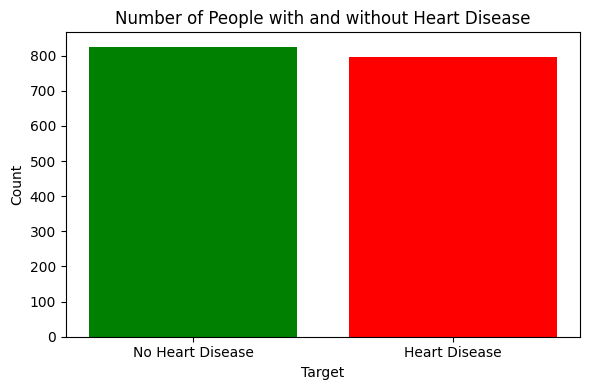

In [210]:
target_counts = combined_dataset['target'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(target_counts.index.astype(str), target_counts.values, color=['green', 'red'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Number of People with and without Heart Disease')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.tight_layout()
plt.show()

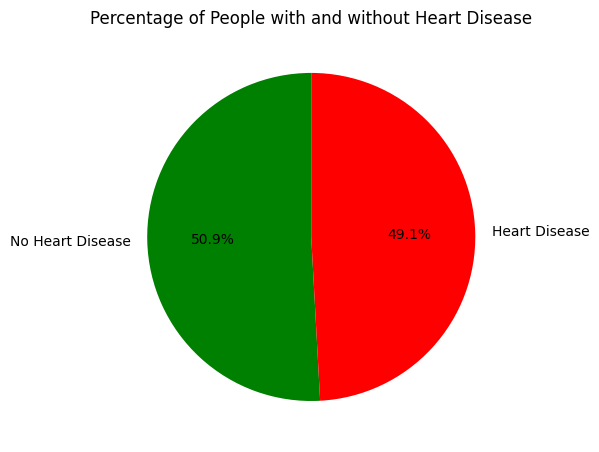

In [211]:
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=['No Heart Disease', 'Heart Disease'], colors=['green', 'red'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage of People with and without Heart Disease')
plt.tight_layout()
plt.show()

Summary Statistics:
               mean  mode   50%
age       53.223798  58.0  54.0
sex        0.698520   1.0   1.0
cp         1.316893   0.0   1.0
trestbps        NaN   120   NaN
chol            NaN   204   NaN
fbs             NaN     0   NaN
restecg         NaN     1   NaN
thalach         NaN   162   NaN
exang           NaN     0   NaN
oldpeak    0.977559   0.0   0.6
slope           NaN     1   NaN
ca              NaN     0   NaN
thal            NaN     2   NaN
target     0.491369   0.0   0.0


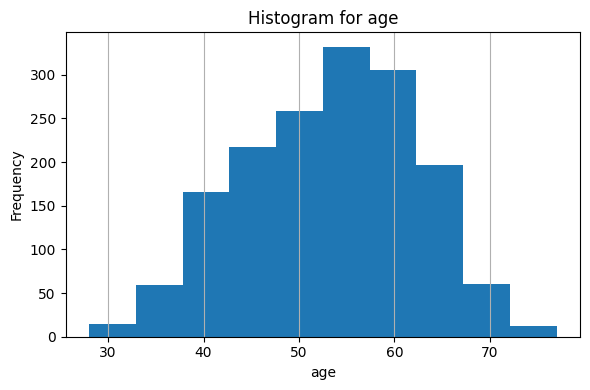

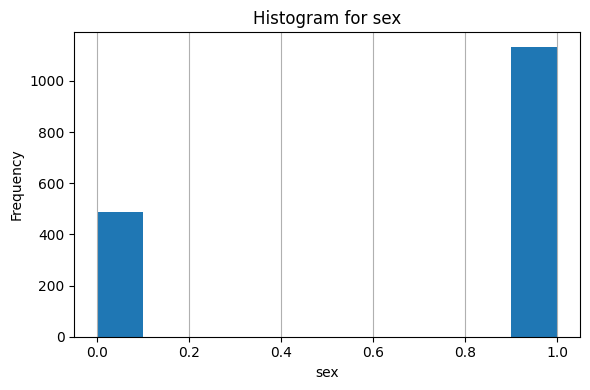

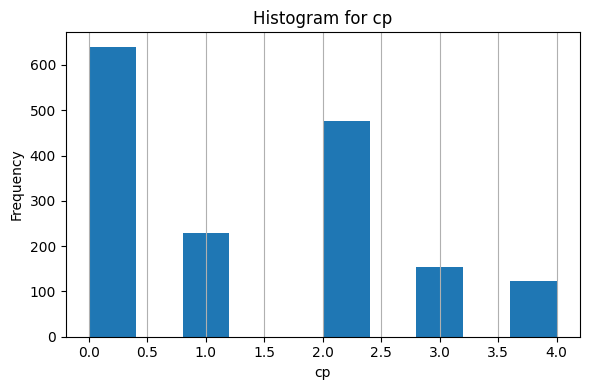

TypeError: '<=' not supported between instances of 'int' and 'str'

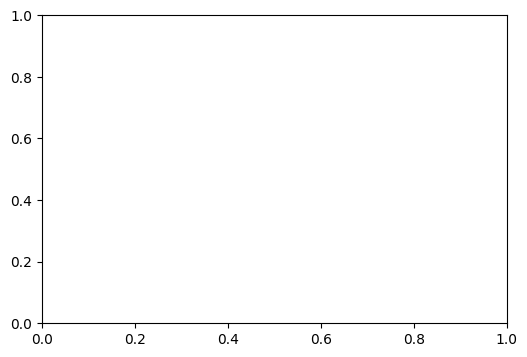

In [212]:
# Виведення середнього значення, моди та медіани кожної колонки
summary_stats = combined_dataset.describe(include='all').T
modes = combined_dataset.mode().iloc[0]

summary_stats['mode'] = modes
summary_stats = summary_stats[['mean', 'mode', '50%']]  # Вибір стовпців для виведення

print("Summary Statistics:")
print(summary_stats)

# Побудова діаграм для кожної колонки
for column in combined_dataset.columns:
    plt.figure(figsize=(6, 4))
    combined_dataset[column].hist()
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

Виведеня кількість NaN значень у кожному стовпці в спільному датасеті

In [213]:
nan_counts = combined_dataset.isnull().sum()
print(nan_counts)

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          291
thal        266
target        0
dtype: int64


ОтДізнаємось мінімальний і максимальний вік людини у датасеті, також візуалізуємо дані, який вік людини зустрічається найчастіше

In [214]:
combined_dataset['age'].min(), combined_dataset['age'].max()

(28, 77)

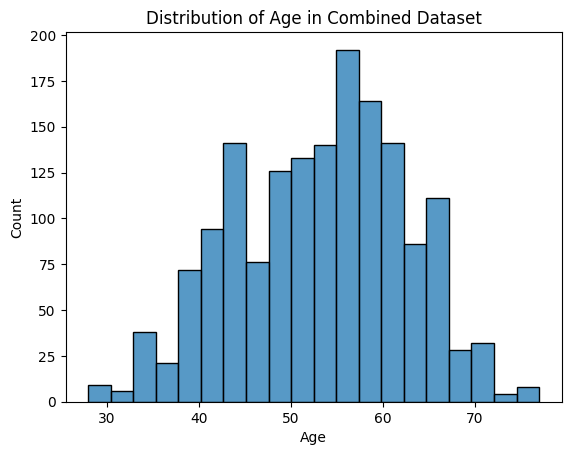

In [215]:
sns.histplot(combined_dataset['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age in Combined Dataset')
plt.show()

Бачимо, що найбільше інфарктів у людей віком від 55 до 60 років. Давайте отримаємо медіану, середнє значення і моду.

In [216]:
age_column = combined_dataset['age']

median_age = age_column.median()
mean_age = age_column.mean()
mode_age = age_column.mode()[0]  

print(f"Медіана віку: {median_age}")
print(f"Середнє значення віку: {mean_age}")
print(f"Мода віку: {mode_age}")

Медіана віку: 54.0
Середнє значення віку: 53.22379778051788
Мода віку: 58


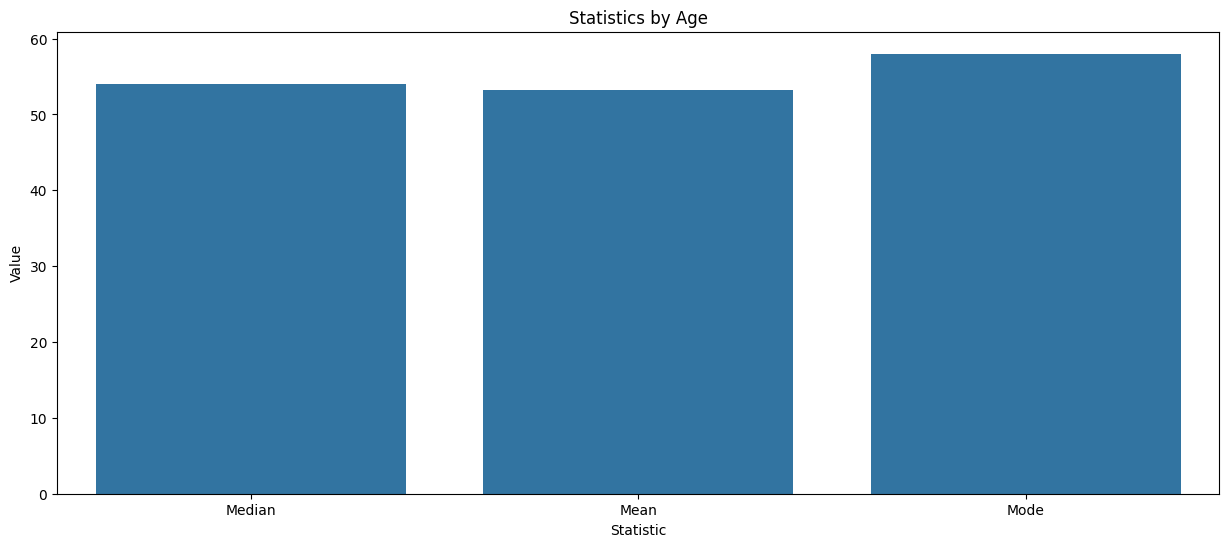

In [217]:
stats_df = pd.DataFrame({'Stat': ['Median', 'Mean', 'Mode'],
                         'Value': [median_age, mean_age, mode_age]})

plt.figure(figsize=(15, 6))
sns.barplot(x='Stat', y='Value', data=stats_df)
plt.title('Statistics by Age')
plt.xlabel('Statistic')
plt.ylabel('Value')
plt.show()

Перевіримо, якої статі більше, чоловіків чи жінок. 0: Жінка, 1: Чоловік

sex
1    1133
0     489
Name: count, dtype: int64


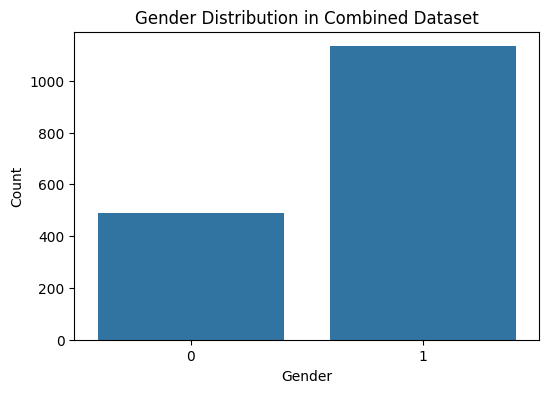

In [218]:
gender_counts = combined_dataset['sex'].value_counts()
print(gender_counts)

plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution in Combined Dataset')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

Чоловіків більше ніж жінок у датасеті, давайте з'ясуємо, який шанс мати інфаркт взалежності від статі.

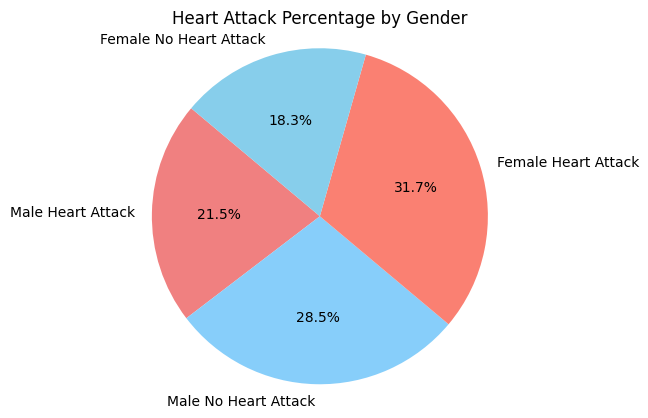

In [219]:
# Групування за статтю та інфарктом
gender_target_groups = combined_dataset.groupby(['sex', 'target']).size()

# Отримання кількості чоловіків та жінок з інфарктом та без нього
male_heart_attack = gender_target_groups[1, 1] if (1, 1) in gender_target_groups.index else 0
male_no_heart_attack = gender_target_groups[1, 0] if (1, 0) in gender_target_groups.index else 0
female_heart_attack = gender_target_groups[0, 1] if (0, 1) in gender_target_groups.index else 0
female_no_heart_attack = gender_target_groups[0, 0] if (0, 0) in gender_target_groups.index else 0

# Обчислення відсоткового співвідношення
total_male = male_heart_attack + male_no_heart_attack
total_female = female_heart_attack + female_no_heart_attack

male_heart_attack_percent = (male_heart_attack / total_male) * 100
male_no_heart_attack_percent = (male_no_heart_attack / total_male) * 100
female_heart_attack_percent = (female_heart_attack / total_female) * 100
female_no_heart_attack_percent = (female_no_heart_attack / total_female) * 100

# Побудова графіку
labels = ['Male Heart Attack', 'Male No Heart Attack', 'Female Heart Attack', 'Female No Heart Attack']
sizes = [male_heart_attack_percent, male_no_heart_attack_percent, female_heart_attack_percent, female_no_heart_attack_percent]
colors = ['lightcoral', 'lightskyblue', 'salmon', 'skyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Heart Attack Percentage by Gender')
plt.show()

Як видно на діаграмі, жінки мають частіше інфаркт, ніж чоловіки.

Визначемо, який тип болю в грудях.
Тип болю в грудях взалежності від значення:

Значення 1: типова стенокардія
Значення 2: атипова стенокардія
Значення 3: неангінальний біль
Значення 4: безсимптомний

cp
0    640
2    477
1    228
3    154
4    123
Name: count, dtype: int64


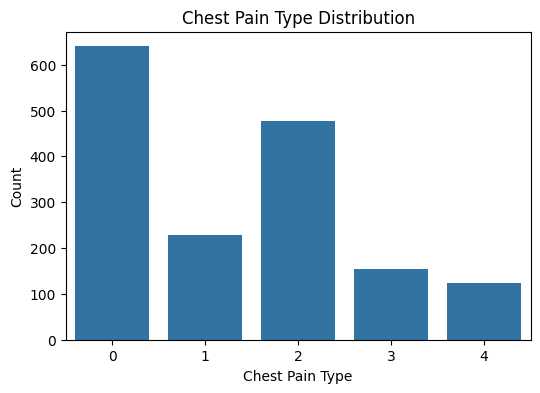

In [220]:
cp_counts = combined_dataset['cp'].value_counts()
print(cp_counts)

plt.figure(figsize=(6, 4))
sns.barplot(x=cp_counts.index, y=cp_counts.values)
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')

plt.show()

Визначимо артеріальний тиск у стані спокою

In [221]:
combined_dataset['trestbps'].describe()

count     1621
unique      80
top        120
freq       165
Name: trestbps, dtype: int64

Обробимо NaN значення у цьому стовпці, оскільки це 1 значення. Ми його можемо використати імпутацію. Це ідеальне місце застосування цього методу, оскільки, нам не потрібно шукати моду, середнє значення чи медіану, тобто робити обрахунки і маніпуляцію з даними. Оскільки пропущене значення тільки 1, то найефективніше буде його видалити.

In [222]:
combined_dataset = combined_dataset.dropna(subset=['trestbps'])
print(combined_dataset)

      age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak slope ca  \
0      63    1   3      145  233   1       0     150     0      2.3     0  0   
1      37    1   2      130  250   0       1     187     0      3.5     0  0   
2      41    0   1      130  204   0       0     172     0      1.4     2  0   
3      56    1   1      120  236   0       1     178     0      0.8     2  0   
4      57    0   0      120  354   0       1     163     1      0.6     2  0   
...   ...  ...  ..      ...  ...  ..     ...     ...   ...      ...   ... ..   
1020   59    1   1      140  221   0       1     164     1      0.0     2  0   
1021   60    1   0      125  258   0       0     141     1      2.8     1  1   
1022   47    1   0      110  275   0       0     118     1      1.0     1  1   
1023   50    0   0      110  254   0       0     159     0      0.0     2  0   
1024   54    1   0      120  188   0       1     113     0      1.4     1  1   

     thal  target  
0       1       1  

Ось такі маніпуляції необхідно зробити для медіани, середнього значення і моди.

Оскільки стовпець trestbps'є типом Object і його необхідно перетворити на числові значення

In [223]:
combined_dataset['trestbps'] = combined_dataset['trestbps'].astype(float)

median_trestbps = combined_dataset['trestbps'].median()
mean_trestbps = combined_dataset['trestbps'].mean()
mode_trestbps = combined_dataset['trestbps'].mode()[0]  


Знову отримаємо інформацію про наш датасет

In [224]:
combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1621 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1621 non-null   int64  
 1   sex       1621 non-null   int64  
 2   cp        1621 non-null   int64  
 3   trestbps  1621 non-null   float64
 4   chol      1598 non-null   object 
 5   fbs       1613 non-null   object 
 6   restecg   1620 non-null   object 
 7   thalach   1621 non-null   object 
 8   exang     1621 non-null   object 
 9   oldpeak   1621 non-null   float64
 10  slope     1431 non-null   object 
 11  ca        1331 non-null   object 
 12  thal      1356 non-null   object 
 13  target    1621 non-null   int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 190.0+ KB


Ще є restecg, де 1 значення є NaN, тобто пропущеним. Давайте його так само обробимо

In [225]:
combined_dataset = combined_dataset.dropna(subset=['restecg'])
print(combined_dataset)

      age  sex  cp  trestbps chol fbs restecg thalach exang  oldpeak slope ca  \
0      63    1   3     145.0  233   1       0     150     0      2.3     0  0   
1      37    1   2     130.0  250   0       1     187     0      3.5     0  0   
2      41    0   1     130.0  204   0       0     172     0      1.4     2  0   
3      56    1   1     120.0  236   0       1     178     0      0.8     2  0   
4      57    0   0     120.0  354   0       1     163     1      0.6     2  0   
...   ...  ...  ..       ...  ...  ..     ...     ...   ...      ...   ... ..   
1020   59    1   1     140.0  221   0       1     164     1      0.0     2  0   
1021   60    1   0     125.0  258   0       0     141     1      2.8     1  1   
1022   47    1   0     110.0  275   0       0     118     1      1.0     1  1   
1023   50    0   0     110.0  254   0       0     159     0      0.0     2  0   
1024   54    1   0     120.0  188   0       1     113     0      1.4     1  1   

     thal  target  
0      

Ось такі маніпуляції необхідно зробити для медіани, середнього значення і моди.

Оскільки стовпець restecg'є типом Object і його необхідно перетворити на числові значення

In [226]:
combined_dataset['restecg'] = combined_dataset['restecg'].astype(float)

median_restecg = combined_dataset['restecg'].median()
mean_restecg = combined_dataset['restecg'].mean()
mode_restecg = combined_dataset['restecg'].mode()[0]

Отримуємо інформацію про датасет

In [227]:
combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1620 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1620 non-null   int64  
 1   sex       1620 non-null   int64  
 2   cp        1620 non-null   int64  
 3   trestbps  1620 non-null   float64
 4   chol      1597 non-null   object 
 5   fbs       1612 non-null   object 
 6   restecg   1620 non-null   float64
 7   thalach   1620 non-null   object 
 8   exang     1620 non-null   object 
 9   oldpeak   1620 non-null   float64
 10  slope     1431 non-null   object 
 11  ca        1331 non-null   object 
 12  thal      1356 non-null   object 
 13  target    1620 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 189.8+ KB


In [228]:
combined_dataset['chol'] = pd.to_numeric(combined_dataset['chol'], errors='coerce').astype(float)
combined_dataset['fbs'] = pd.to_numeric(combined_dataset['fbs'], errors='coerce').astype(float)
combined_dataset['slope'] = pd.to_numeric(combined_dataset['slope'], errors='coerce').astype(float)
combined_dataset['ca'] = pd.to_numeric(combined_dataset['ca'], errors='coerce').astype(float)
combined_dataset['thal'] = pd.to_numeric(combined_dataset['thal'], errors='coerce').astype(float)

# Виведення оновленої інформації про датасет
print(combined_dataset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1620 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1620 non-null   int64  
 1   sex       1620 non-null   int64  
 2   cp        1620 non-null   int64  
 3   trestbps  1620 non-null   float64
 4   chol      1597 non-null   float64
 5   fbs       1612 non-null   float64
 6   restecg   1620 non-null   float64
 7   thalach   1620 non-null   object 
 8   exang     1620 non-null   object 
 9   oldpeak   1620 non-null   float64
 10  slope     1431 non-null   float64
 11  ca        1331 non-null   float64
 12  thal      1356 non-null   float64
 13  target    1620 non-null   int64  
dtypes: float64(8), int64(4), object(2)
memory usage: 189.8+ KB
None


Порівняємо різні методи імпутації, для цього зробимо цикл, який буде проходитися по стовпцях, які містять NaN значення, і по них будемо застосовувати різні методи імпутації.

In [229]:
# Список стовпців, для яких потрібно виконати імпутацію
columns_to_impute = ['chol', 'fbs', 'slope', 'ca', 'thal']

# Копія початкового датасету для кожного методу імпутації
median_dataset = combined_dataset.copy()
mean_dataset = combined_dataset.copy()
mode_dataset = combined_dataset.copy()
constant_dataset = combined_dataset.copy()
deleted_nan_dataset = combined_dataset.copy()
knn_dataset = combined_dataset.copy()

# Цикл для кожного методу імпутації
for column in columns_to_impute:
    # Медіана
    median_value = combined_dataset[column].median()
    median_dataset[column] = median_dataset[column].fillna(median_value)

    # Середнє значення
    mean_value = combined_dataset[column].mean()
    mean_dataset[column] = mean_dataset[column].fillna(mean_value)

    # Мода
    mode_value = combined_dataset[column].mode()[0]
    mode_dataset[column] = mode_dataset[column].fillna(mode_value)

    # Видалення NaN значень
    deleted_nan_dataset = deleted_nan_dataset.dropna(subset=[column])

    # Заміна на константу
    constant_value = 0  # Наприклад, вибір деякої константи
    constant_dataset[column] = constant_dataset[column].fillna(constant_value)

knn_imputer = KNNImputer(n_neighbors=5)
knn_dataset[columns_to_impute] = knn_imputer.fit_transform(knn_dataset[columns_to_impute])

# Виведення інформації про оновлені датасети
print("Median Dataset:")
print(median_dataset.info())

print("\nMean Dataset:")
print(mean_dataset.info())

print("\nMode Dataset:")
print(mode_dataset.info())

print("\nDeleted NaN Dataset:")
print(deleted_nan_dataset.info())

print("\nConstant Dataset:")
print(constant_dataset.info())


print("\nKNN Imputed Dataset:")
print(knn_dataset.info())

Median Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 1620 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1620 non-null   int64  
 1   sex       1620 non-null   int64  
 2   cp        1620 non-null   int64  
 3   trestbps  1620 non-null   float64
 4   chol      1620 non-null   float64
 5   fbs       1620 non-null   float64
 6   restecg   1620 non-null   float64
 7   thalach   1620 non-null   object 
 8   exang     1620 non-null   object 
 9   oldpeak   1620 non-null   float64
 10  slope     1620 non-null   float64
 11  ca        1620 non-null   float64
 12  thal      1620 non-null   float64
 13  target    1620 non-null   int64  
dtypes: float64(8), int64(4), object(2)
memory usage: 189.8+ KB
None

Mean Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 1620 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  --

Робимо моделі машинного навчання, для отримання найоптимальніших результатів. Розбиваємо дані на тестові і валідаційні для кожного виду імпутації

In [230]:
X_median = median_dataset.drop('target', axis=1)
y_median = median_dataset['target']

X_train_median, X_test_median, y_train_median, y_test_median = train_test_split(X_median, y_median, test_size=0.1, random_state=42)


X_mean = mean_dataset.drop('target', axis=1)
y_mean = mean_dataset['target']

X_train_mean, X_test_mean, y_train_mean, y_test_mean = train_test_split(X_mean, y_mean, test_size=0.1, random_state=42)


X_mode = mode_dataset.drop('target', axis=1)
y_mode = mode_dataset['target']

X_train_mode, X_test_mode, y_train_mode, y_test_mode = train_test_split(X_mode, y_mode, test_size=0.1, random_state=42)


X_deleted_nan = deleted_nan_dataset.drop('target', axis=1)
y_deleted_nan = deleted_nan_dataset['target']

X_train_deleted_nan, X_test_deleted_nan, y_train_deleted_nan, y_test_deleted_nan = train_test_split(X_deleted_nan, y_deleted_nan, test_size=0.1, random_state=42)



X_constant = constant_dataset.drop('target', axis=1)
y_constant = constant_dataset['target']

X_train_constant, X_test_constant, y_train_constant, y_test_constant = train_test_split(X_constant, y_constant, test_size=0.1, random_state=42)

X_knn = knn_dataset.drop('target', axis=1)
y_knn = knn_dataset['target']

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.1, random_state=42)

Кількість тренувальних рядків: 1458
Кількість тестових рядків: 162


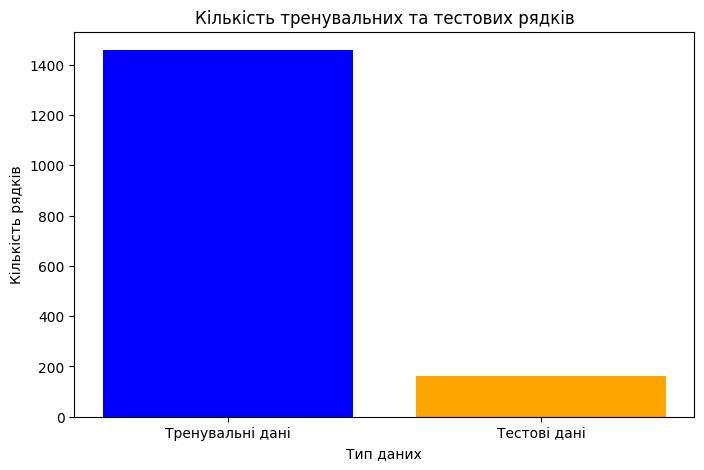

In [231]:
train_rows = len(X_train_median)
test_rows = len(X_test_median)

# Виводимо інформацію про кількість тренувальних та тестових рядків
print(f"Кількість тренувальних рядків: {train_rows}")
print(f"Кількість тестових рядків: {test_rows}")

# Побудова діаграми
plt.figure(figsize=(8, 5))
plt.bar(['Тренувальні дані', 'Тестові дані'], [train_rows, test_rows], color=['blue', 'orange'])
plt.xlabel('Тип даних')
plt.ylabel('Кількість рядків')
plt.title('Кількість тренувальних та тестових рядків')
plt.show()

Імпортуємо необхідні бібліотеки для машинного навчання

In [232]:
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error


Створюємо масив з різними моделями машинного навчання

In [236]:
models = [
    ('KNeighbors Classifier', KNeighborsClassifier()),
    ('Logistic Regression', LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)),
    ('Decision Tree Classifier', DecisionTreeClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Naye base Classifier', GaussianNB())
]

datasets = [
    ('Median Imputation', X_train_median, X_test_median, y_train_median, y_test_median),
    ('Mean Imputation', X_train_mean, X_test_mean, y_train_mean, y_test_mean),
    ('Mode Imputation', X_train_mode, X_test_mode, y_train_mode, y_test_mode),
    ('Deleted NaN Imputation', X_train_deleted_nan, X_test_deleted_nan, y_train_deleted_nan, y_test_deleted_nan),
    ('Constant Imputation', X_train_constant, X_test_constant, y_train_constant, y_test_constant),
      ('KNN Imputation', X_train_knn, X_test_knn, y_train_knn, y_test_knn)
]

In [237]:

best_model = None
best_accuracy = 0.0

for dataset_name, X_train, X_test, y_train, y_test in datasets:
    print(f"Dataset: {dataset_name}")
    print("---------------------")
    for model_name, model in models:
        pipeline = Pipeline([('model', model)])

        scores = cross_val_score(pipeline, X_train, y_train, cv=5)

        pipeline.fit(X_train, y_train)

        y_pred = pipeline.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)

        print(f"Model: {model_name}")
        print("Dataset Used: ", dataset_name)
        print("Test Accuracy: ", accuracy)
        print()
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = (dataset_name, model_name, pipeline)

print("Best Model: ", best_model)

Dataset: Median Imputation
---------------------
Model: KNeighbors Classifier
Dataset Used:  Median Imputation
Test Accuracy:  0.8765432098765432

Model: Logistic Regression
Dataset Used:  Median Imputation
Test Accuracy:  0.691358024691358

Model: Decision Tree Classifier
Dataset Used:  Median Imputation
Test Accuracy:  0.9506172839506173

Model: Gradient Boosting
Dataset Used:  Median Imputation
Test Accuracy:  0.8950617283950617

Model: Naye base Classifier
Dataset Used:  Median Imputation
Test Accuracy:  0.6975308641975309

Dataset: Mean Imputation
---------------------
Model: KNeighbors Classifier
Dataset Used:  Mean Imputation
Test Accuracy:  0.8827160493827161

Model: Logistic Regression
Dataset Used:  Mean Imputation
Test Accuracy:  0.7345679012345679

Model: Decision Tree Classifier
Dataset Used:  Mean Imputation
Test Accuracy:  0.9567901234567902

Model: Gradient Boosting
Dataset Used:  Mean Imputation
Test Accuracy:  0.8950617283950617

Model: Naye base Classifier
Dataset Us

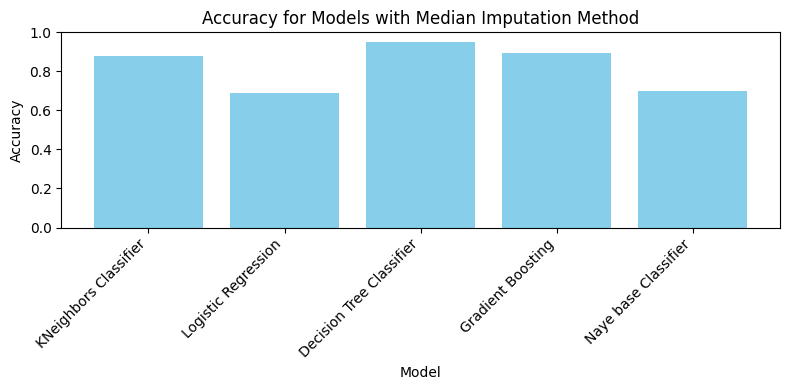

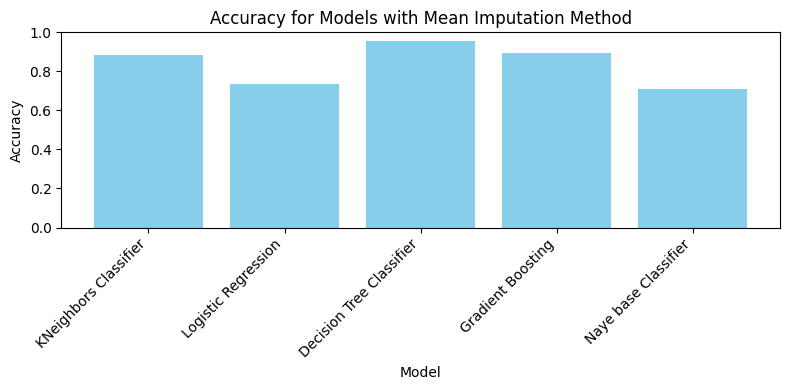

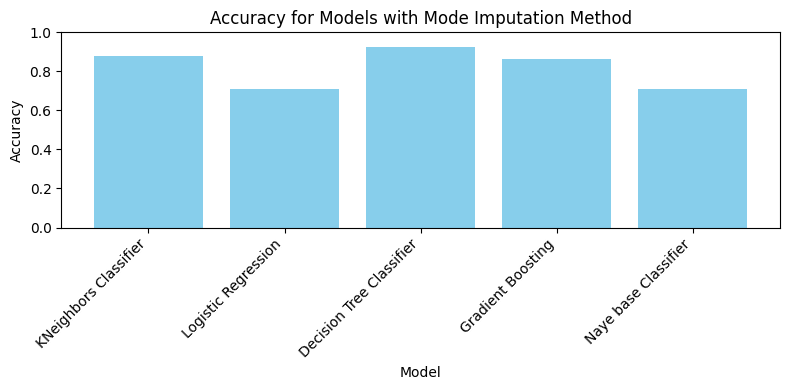

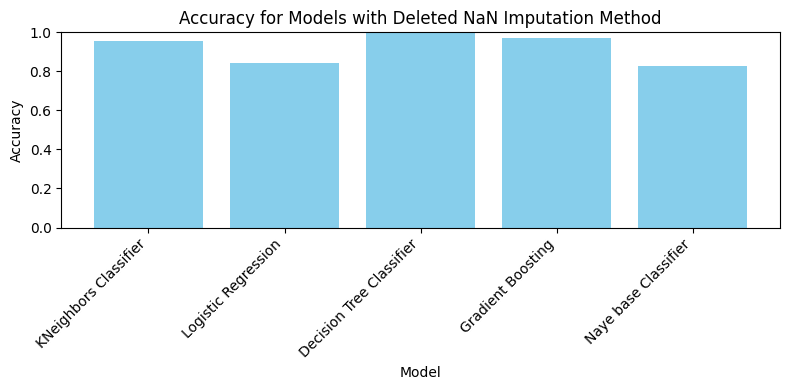

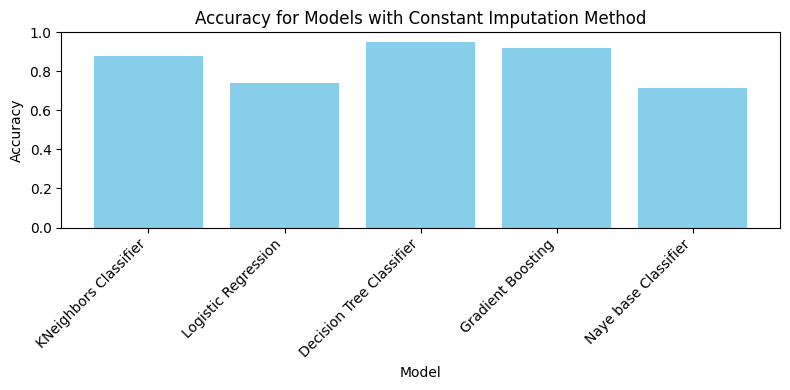

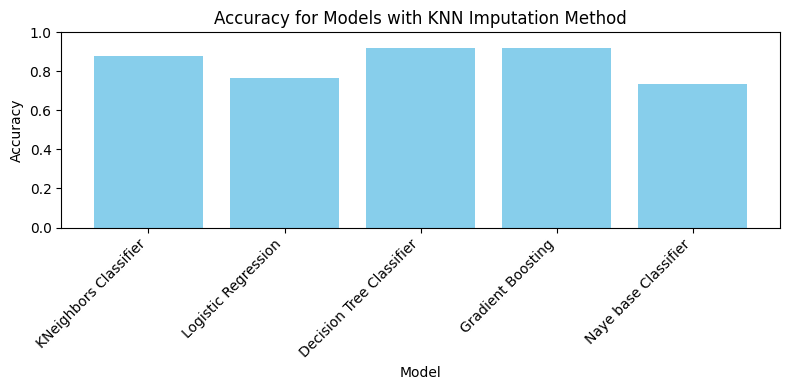

In [238]:

# Функція для створення графіка для конкретного методу імпутації
def plot_accuracy_for_imputation_method(dataset_name, X_train, X_test, y_train, y_test, models):
    model_names = []
    accuracy_values = []

    for model_name, model in models:
        pipeline = Pipeline([('model', model)])

        scores = cross_val_score(pipeline, X_train, y_train, cv=5)
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        model_names.append(model_name)
        accuracy_values.append(accuracy)

    plt.figure(figsize=(8, 4))
    plt.bar(model_names, accuracy_values, color='skyblue')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy for Models with {dataset_name} Imputation Method')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

# Виклик функції для кожного методу імпутації
plot_accuracy_for_imputation_method('Median', X_train_median, X_test_median, y_train_median, y_test_median, models)
plot_accuracy_for_imputation_method('Mean', X_train_mean, X_test_mean, y_train_mean, y_test_mean, models)
plot_accuracy_for_imputation_method('Mode', X_train_mode, X_test_mode, y_train_mode, y_test_mode, models)
plot_accuracy_for_imputation_method('Deleted NaN', X_train_deleted_nan, X_test_deleted_nan, y_train_deleted_nan, y_test_deleted_nan, models)
plot_accuracy_for_imputation_method('Constant', X_train_constant, X_test_constant, y_train_constant, y_test_constant, models)
plot_accuracy_for_imputation_method('KNN', X_train_knn, X_test_knn, y_train_knn, y_test_knn, models)

Model: KNeighbors Classifier
Dataset Used:  Median Imputation
Test Accuracy:  0.8765432098765432
Dataset Used:  Mean Imputation
Test Accuracy:  0.8827160493827161
Dataset Used:  Mode Imputation
Test Accuracy:  0.8765432098765432
Dataset Used:  Deleted NaN Imputation
Test Accuracy:  0.9548872180451128
Dataset Used:  Constant Imputation
Test Accuracy:  0.8765432098765432
Dataset Used:  KNN Imputation
Test Accuracy:  0.8765432098765432


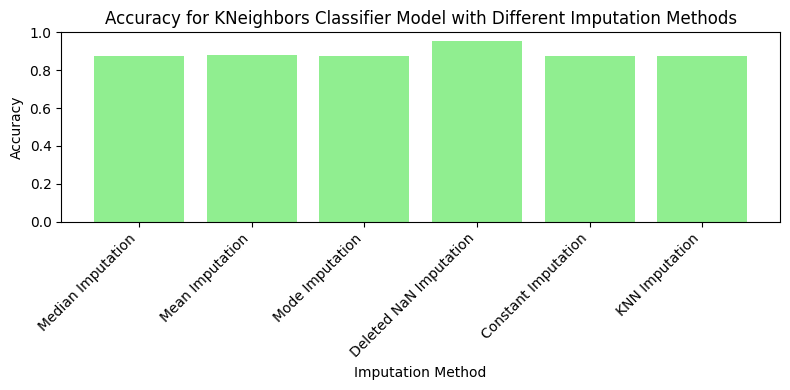

Model: Logistic Regression
Dataset Used:  Median Imputation
Test Accuracy:  0.691358024691358
Dataset Used:  Mean Imputation
Test Accuracy:  0.7345679012345679
Dataset Used:  Mode Imputation
Test Accuracy:  0.7098765432098766
Dataset Used:  Deleted NaN Imputation
Test Accuracy:  0.8421052631578947
Dataset Used:  Constant Imputation
Test Accuracy:  0.7407407407407407
Dataset Used:  KNN Imputation
Test Accuracy:  0.7654320987654321


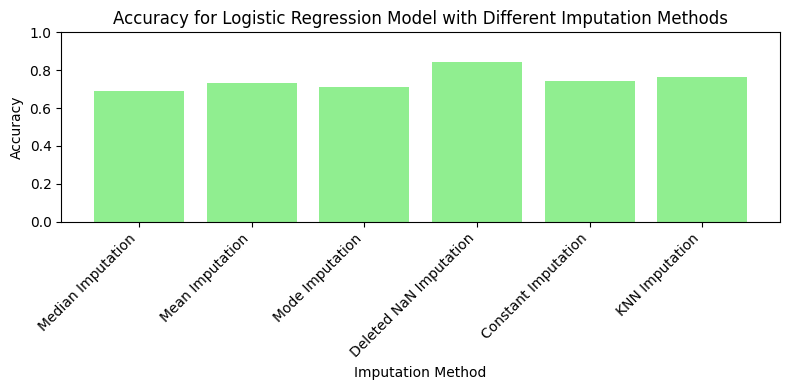

Model: Decision Tree Classifier
Dataset Used:  Median Imputation
Test Accuracy:  0.9506172839506173
Dataset Used:  Mean Imputation
Test Accuracy:  0.9567901234567902
Dataset Used:  Mode Imputation
Test Accuracy:  0.9259259259259259
Dataset Used:  Deleted NaN Imputation
Test Accuracy:  1.0
Dataset Used:  Constant Imputation
Test Accuracy:  0.9506172839506173
Dataset Used:  KNN Imputation
Test Accuracy:  0.9197530864197531


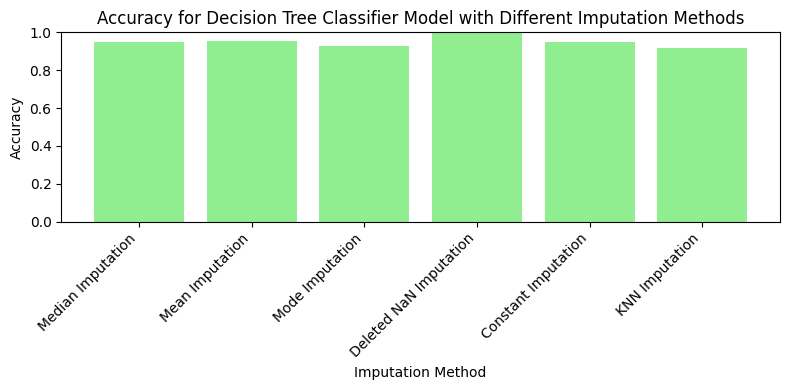

Model: Gradient Boosting
Dataset Used:  Median Imputation
Test Accuracy:  0.8950617283950617
Dataset Used:  Mean Imputation
Test Accuracy:  0.8950617283950617
Dataset Used:  Mode Imputation
Test Accuracy:  0.8641975308641975
Dataset Used:  Deleted NaN Imputation
Test Accuracy:  0.9699248120300752
Dataset Used:  Constant Imputation
Test Accuracy:  0.9197530864197531
Dataset Used:  KNN Imputation
Test Accuracy:  0.9197530864197531


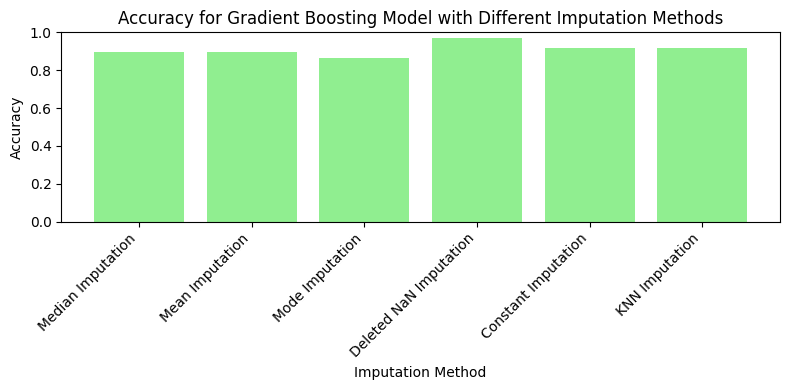

Model: Naive Bayes Classifier
Dataset Used:  Median Imputation
Test Accuracy:  0.6975308641975309
Dataset Used:  Mean Imputation
Test Accuracy:  0.7098765432098766
Dataset Used:  Mode Imputation
Test Accuracy:  0.7098765432098766
Dataset Used:  Deleted NaN Imputation
Test Accuracy:  0.8270676691729323
Dataset Used:  Constant Imputation
Test Accuracy:  0.7160493827160493
Dataset Used:  KNN Imputation
Test Accuracy:  0.7345679012345679


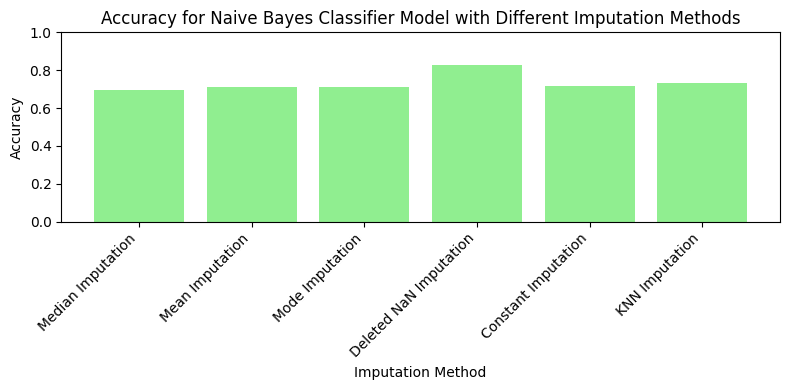

In [241]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define the estimator objects
knn_classifier = KNeighborsClassifier()
logistic_regression = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)
naive_bayes = GaussianNB()

# List of models and their corresponding estimator objects
models = [
    ('KNeighbors Classifier', knn_classifier),
    ('Logistic Regression', logistic_regression),
    ('Decision Tree Classifier', decision_tree),
    ('Gradient Boosting', gradient_boosting),
    ('Naive Bayes Classifier', naive_bayes)
]

# Code for imputation and splitting data goes here

# Define a function to plot accuracy for each model
def plot_accuracy_for_ml_method(model_name, model, X_train, X_test, y_train, y_test, imputation_datasets):
    dataset_names = []
    accuracy_values = []
    print(f"Model: {model_name}")
    for dataset_name, X_train_imp, X_test_imp, y_train_imp, y_test_imp in imputation_datasets:
        pipeline = Pipeline([('imputation', 'passthrough'), ('model', model)])
        
        pipeline.fit(X_train_imp, y_train_imp)
        y_pred = pipeline.predict(X_test_imp)
        accuracy = accuracy_score(y_test_imp, y_pred)

        dataset_names.append(dataset_name)
        accuracy_values.append(accuracy)

    
        print("Dataset Used: ", dataset_name)
        print("Test Accuracy: ", accuracy)

    plt.figure(figsize=(8, 4))
    plt.bar(dataset_names, accuracy_values, color='lightgreen')
    plt.xlabel('Imputation Method')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy for {model_name} Model with Different Imputation Methods')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

# Call the function for each model
for model_name, model in models:
    plot_accuracy_for_ml_method(model_name, model, X_train, X_test, y_train, y_test, datasets)


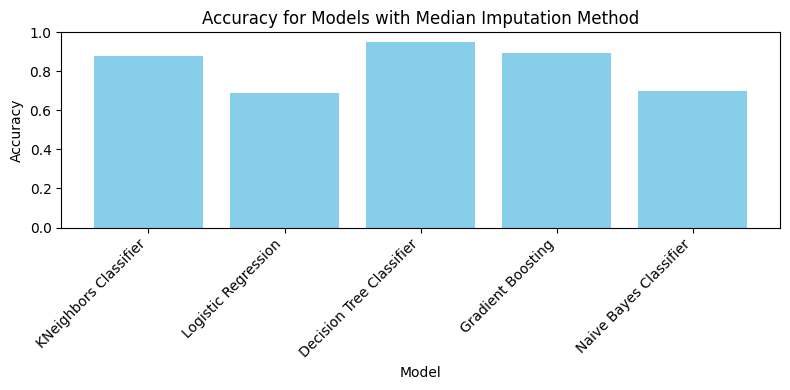

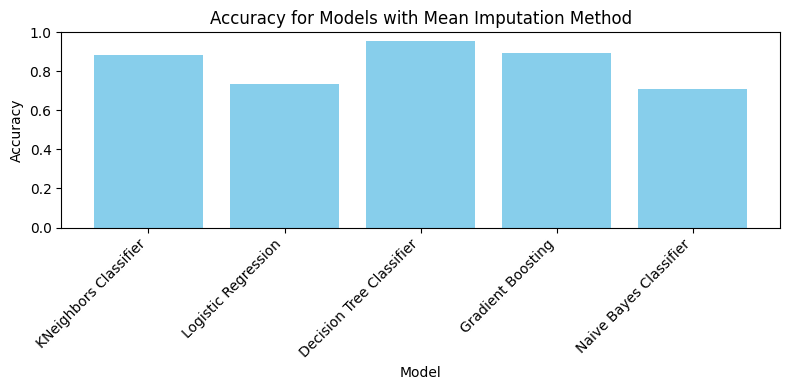

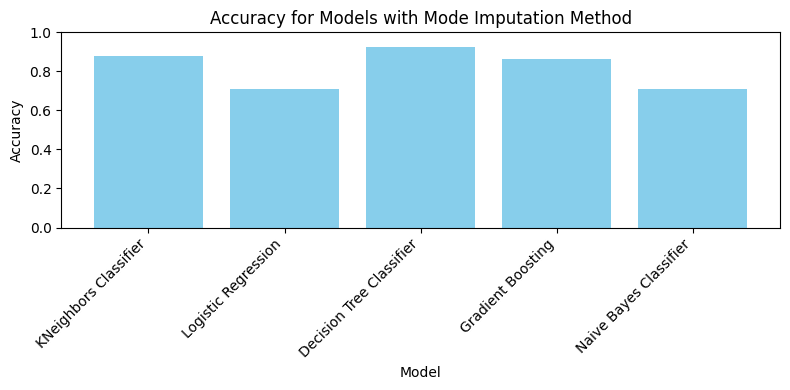

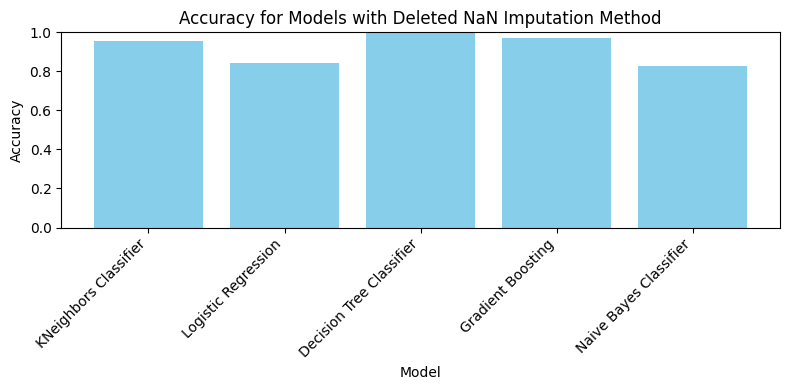

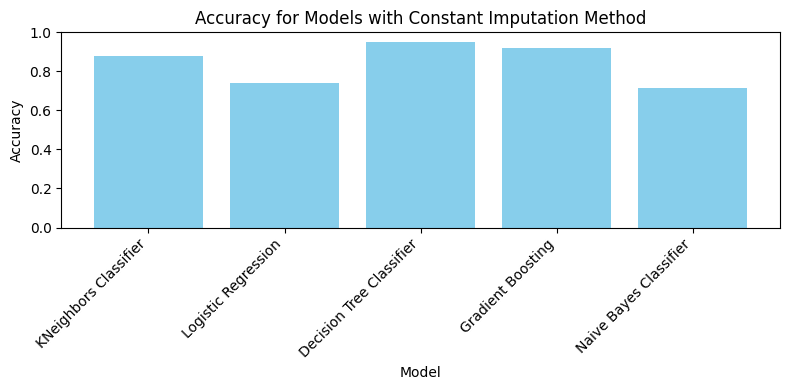

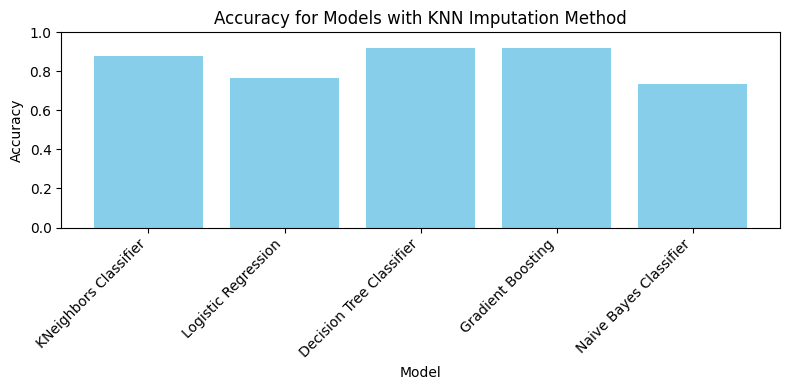

Dataset: Median Imputation
---------------------
Model: KNeighbors Classifier
Dataset Used:  Median Imputation
Test Accuracy:  0.8765432098765432

Model: Logistic Regression
Dataset Used:  Median Imputation
Test Accuracy:  0.691358024691358

Model: Decision Tree Classifier
Dataset Used:  Median Imputation
Test Accuracy:  0.9506172839506173

Model: Gradient Boosting
Dataset Used:  Median Imputation
Test Accuracy:  0.8950617283950617

Model: Naive Bayes Classifier
Dataset Used:  Median Imputation
Test Accuracy:  0.6975308641975309

Dataset: Mean Imputation
---------------------
Model: KNeighbors Classifier
Dataset Used:  Mean Imputation
Test Accuracy:  0.8827160493827161

Model: Logistic Regression
Dataset Used:  Mean Imputation
Test Accuracy:  0.7345679012345679

Model: Decision Tree Classifier
Dataset Used:  Mean Imputation
Test Accuracy:  0.9567901234567902

Model: Gradient Boosting
Dataset Used:  Mean Imputation
Test Accuracy:  0.8950617283950617

Model: Naive Bayes Classifier
Datase

In [240]:
def plot_accuracy_for_imputation_method(dataset_name, X_train, X_test, y_train, y_test, models):
    model_names = []
    accuracy_values = []

    for model_name, model in models:
        pipeline = Pipeline([('model', model)])

        scores = cross_val_score(pipeline, X_train, y_train, cv=5)
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        model_names.append(model_name)
        accuracy_values.append(accuracy)

    plt.figure(figsize=(8, 4))
    plt.bar(model_names, accuracy_values, color='skyblue')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy for Models with {dataset_name} Imputation Method')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

# Виклик функції для кожного методу імпутації
plot_accuracy_for_imputation_method('Median', X_train_median, X_test_median, y_train_median, y_test_median, models)
plot_accuracy_for_imputation_method('Mean', X_train_mean, X_test_mean, y_train_mean, y_test_mean, models)
plot_accuracy_for_imputation_method('Mode', X_train_mode, X_test_mode, y_train_mode, y_test_mode, models)
plot_accuracy_for_imputation_method('Deleted NaN', X_train_deleted_nan, X_test_deleted_nan, y_train_deleted_nan, y_test_deleted_nan, models)
plot_accuracy_for_imputation_method('Constant', X_train_constant, X_test_constant, y_train_constant, y_test_constant, models)
plot_accuracy_for_imputation_method('KNN', X_train_knn, X_test_knn, y_train_knn, y_test_knn, models)

# Найкраща модель
best_model = None
best_accuracy = 0.0

# Тренування та оцінка моделей
for dataset_name, X_train, X_test, y_train, y_test in datasets:
    print(f"Dataset: {dataset_name}")
    print("---------------------")
    for model_name, model in models:
        pipeline = Pipeline([('model', model)])

        scores = cross_val_score(pipeline, X_train, y_train, cv=5)

        pipeline.fit(X_train, y_train)

        y_pred = pipeline.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)

        print(f"Model: {model_name}")
        print("Dataset Used: ", dataset_name)
        print("Test Accuracy: ", accuracy)
        print()
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = (dataset_name, model_name, pipeline)

print("Best Model: ", best_model)

Model: KNeighbors Classifier
Dataset Used:  Median Imputation
Test Accuracy:  0.8765432098765432
Model: KNeighbors Classifier
Dataset Used:  Mean Imputation
Test Accuracy:  0.8827160493827161
Model: KNeighbors Classifier
Dataset Used:  Mode Imputation
Test Accuracy:  0.8765432098765432
Model: KNeighbors Classifier
Dataset Used:  Deleted NaN Imputation
Test Accuracy:  0.9548872180451128
Model: KNeighbors Classifier
Dataset Used:  Constant Imputation
Test Accuracy:  0.8765432098765432
Model: KNeighbors Classifier
Dataset Used:  KNN Imputation
Test Accuracy:  0.8765432098765432


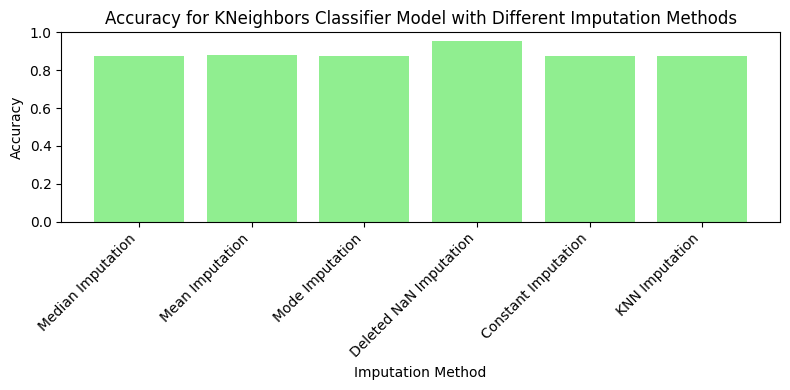

Model: Logistic Regression
Dataset Used:  Median Imputation
Test Accuracy:  0.691358024691358
Model: Logistic Regression
Dataset Used:  Mean Imputation
Test Accuracy:  0.7345679012345679
Model: Logistic Regression
Dataset Used:  Mode Imputation
Test Accuracy:  0.7098765432098766
Model: Logistic Regression
Dataset Used:  Deleted NaN Imputation
Test Accuracy:  0.8421052631578947
Model: Logistic Regression
Dataset Used:  Constant Imputation
Test Accuracy:  0.7407407407407407
Model: Logistic Regression
Dataset Used:  KNN Imputation
Test Accuracy:  0.7654320987654321


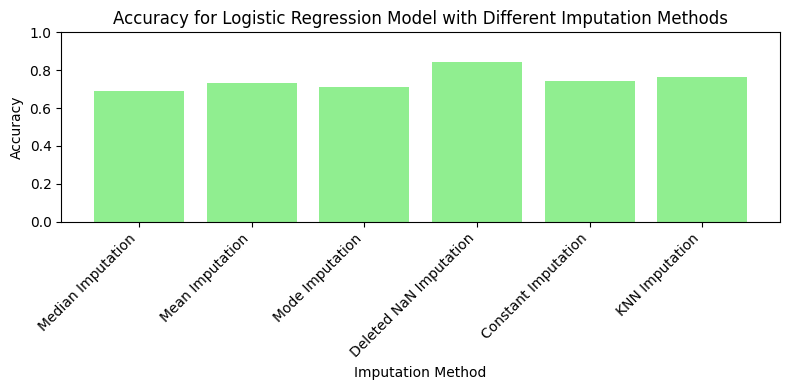

Model: Decision Tree Classifier
Dataset Used:  Median Imputation
Test Accuracy:  0.9506172839506173
Model: Decision Tree Classifier
Dataset Used:  Mean Imputation
Test Accuracy:  0.9567901234567902
Model: Decision Tree Classifier
Dataset Used:  Mode Imputation
Test Accuracy:  0.9259259259259259
Model: Decision Tree Classifier
Dataset Used:  Deleted NaN Imputation
Test Accuracy:  1.0
Model: Decision Tree Classifier
Dataset Used:  Constant Imputation
Test Accuracy:  0.9506172839506173
Model: Decision Tree Classifier
Dataset Used:  KNN Imputation
Test Accuracy:  0.9197530864197531


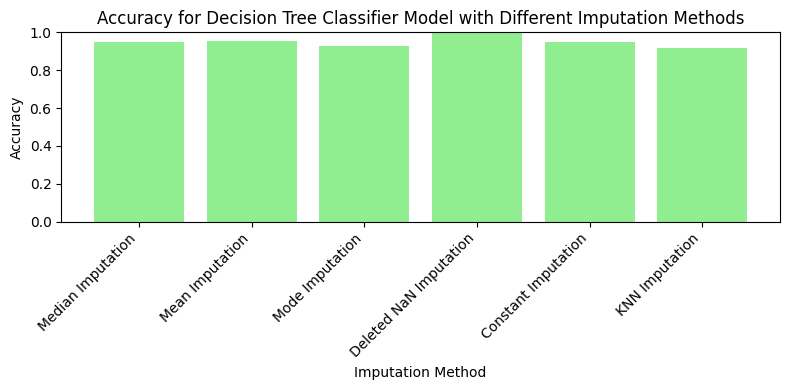

Model: Gradient Boosting
Dataset Used:  Median Imputation
Test Accuracy:  0.8950617283950617
Model: Gradient Boosting
Dataset Used:  Mean Imputation
Test Accuracy:  0.8950617283950617
Model: Gradient Boosting
Dataset Used:  Mode Imputation
Test Accuracy:  0.8641975308641975
Model: Gradient Boosting
Dataset Used:  Deleted NaN Imputation
Test Accuracy:  0.9699248120300752
Model: Gradient Boosting
Dataset Used:  Constant Imputation
Test Accuracy:  0.9197530864197531
Model: Gradient Boosting
Dataset Used:  KNN Imputation
Test Accuracy:  0.9197530864197531


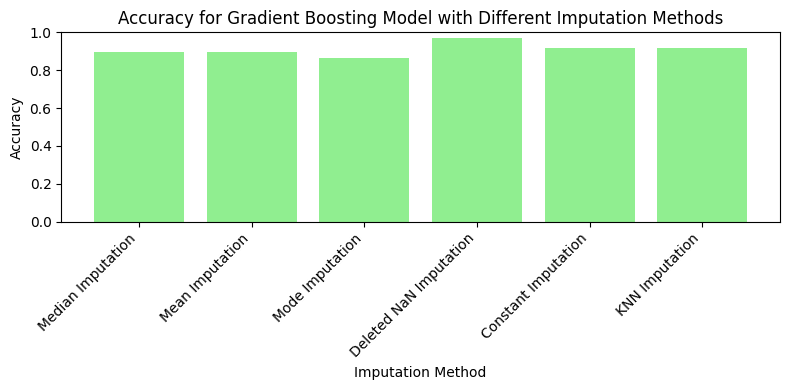

Model: Naive Bayes Classifier
Dataset Used:  Median Imputation
Test Accuracy:  0.6975308641975309
Model: Naive Bayes Classifier
Dataset Used:  Mean Imputation
Test Accuracy:  0.7098765432098766
Model: Naive Bayes Classifier
Dataset Used:  Mode Imputation
Test Accuracy:  0.7098765432098766
Model: Naive Bayes Classifier
Dataset Used:  Deleted NaN Imputation
Test Accuracy:  0.8270676691729323
Model: Naive Bayes Classifier
Dataset Used:  Constant Imputation
Test Accuracy:  0.7160493827160493
Model: Naive Bayes Classifier
Dataset Used:  KNN Imputation
Test Accuracy:  0.7345679012345679


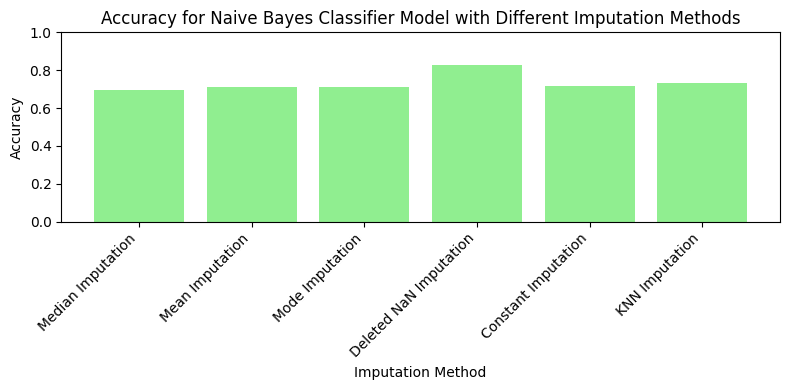

In [197]:
# Define a function to plot accuracy for each model
def plot_accuracy_for_ml_method(model_name, model, imputation_datasets):
    dataset_names = []
    accuracy_values = []

    for dataset_name, X_train_imp, X_test_imp, y_train_imp, y_test_imp in imputation_datasets:
        pipeline = Pipeline([('imputation', 'passthrough'), ('model', model)])
        
        pipeline.fit(X_train_imp, y_train_imp)
        y_pred = pipeline.predict(X_test_imp)
        accuracy = accuracy_score(y_test_imp, y_pred)

        dataset_names.append(dataset_name)
        accuracy_values.append(accuracy)

        print(f"Model: {model_name}")
        print("Dataset Used: ", dataset_name)
        print("Test Accuracy: ", accuracy)

    plt.figure(figsize=(8, 4))
    plt.bar(dataset_names, accuracy_values, color='lightgreen')
    plt.xlabel('Imputation Method')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy for {model_name} Model with Different Imputation Methods')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

# Call the function for each model
for model_name, model in models:
    plot_accuracy_for_ml_method(model_name, model, datasets)
